In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Режимные параметры

In [2]:
Pc = 0.921*1e6
print('Давление на входе в теплообменник Па:', Pc)

Давление на входе в теплообменник Па: 921000.0


In [3]:
Gg = 45663/3600/2
print('Расход газовой смеси кг/с:', Gg)

Расход газовой смеси кг/с: 6.342083333333333


In [4]:
Goil = 116756/3600/2
print('Расход газовой нефтепродуктов кг/с:', Goil)

Расход газовой нефтепродуктов кг/с: 16.21611111111111


## Свойства материалов

In [5]:
visc = 0.0002903
print('Вязкость нефтепродуктов', visc)
roil = 685
print('Плотность нефтепродуктов', roil)
sigma = 0.01612
print('Коэффициент поверхностного натяжения нефтепродуктов', sigma)
rH2 = 5.89                                                                    # тут интересно что по уравнению Менделеева-Клайперона не выходит, в ТЗ 3.3743 !!!
print('Плотность H2', rH2)
viscH2 = 1.398e-05
print('Вязкость H2', viscH2)

Вязкость нефтепродуктов 0.0002903
Плотность нефтепродуктов 685
Коэффициент поверхностного натяжения нефтепродуктов 0.01612
Плотность H2 5.89
Вязкость H2 1.398e-05


## Геометрия и скорости потока

Геометрия канала для подвода нефтепродуктов (сечения)

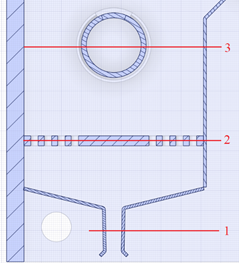

In [6]:
doil = 0.005          # диаметр отверстия
ioil = 98*2+97        # кол-во отверстий
Soil = (np.pi*doil**2)/4*ioil
print('Площадь проходного сечения суммарного', Soil)

Площадь проходного сечения суммарного 0.005753041546886308


In [7]:
S1gas = 1.5*0.03
print('Первое сечение канала подвода H2', S1gas)
dgas = 0.015                    # диаметр отверстия
igas = 55*8                     # кол-во отверстий
S2gas = (np.pi*dgas**2)/4*igas
print('Второе сечение канала подвода H2', S2gas)
S3gas = 1.5*(0.36-0.13)
print('Третье сечение канала подвода H2', S3gas)

Первое сечение канала подвода H2 0.045
Второе сечение канала подвода H2 0.07775441817634737
Третье сечение канала подвода H2 0.345


In [8]:
VFgas = Gg/rH2
VFoil = Goil/roil
print('Объемный расход H2', VFgas)
print('Объемный расход нефтепродуктов', VFoil)

Объемный расход H2 1.0767543859649122
Объемный расход нефтепродуктов 0.02367315490673155


In [9]:
Vel_gas1 = VFgas/S1gas
Vel_gas2 = VFgas/S2gas
Vel_gas3 = VFgas/S3gas
print ('Расходная скорость газа в сечении 1', Vel_gas1)
print ('Расходная скорость газа в сечении 2', Vel_gas2)
print ('Расходная скорость газа в сечении 3', Vel_gas3)

Расходная скорость газа в сечении 1 23.92787524366472
Расходная скорость газа в сечении 2 13.848144082601562
Расходная скорость газа в сечении 3 3.121027205695398


## Коэффициент расхода и среднерасходная скорость в канале

In [10]:
# Длина канала
lc = 0.01 
# Относительная длина канала (характерные значения 3<<6)
lrel=lc/doil
print('Относительная длина канала:', lrel)

Относительная длина канала: 2.0


**Число Рейнольдса**

In [36]:
Cd = 0.75        # сначала примем, потом пересчитаем

In [37]:
Vel_oil = VFoil/Soil/Cd

In [38]:
Re = Vel_oil*doil*roil/visc
print('Число Рейнольдса', Re)

Число Рейнольдса 64730.789821947714


According to Nakayama коэффициент расхода:

In [39]:
Cd = 0.868-0.0425*np.sqrt(lc/doil)
print('Коэффициент расхода по Nakayama', Cd)

Коэффициент расхода по Nakayama 0.8078959235991434


In [40]:
Vel_oil = VFoil/Soil/Cd
print ('Расходная скорость для нефтепродуктов', Vel_oil)

Расходная скорость для нефтепродуктов 5.09334638894204


**Пересчет Числа Рейнольдса**

In [41]:
Re = Vel_oil*doil*roil/visc
print('Число Рейнольдса', Re)

Число Рейнольдса 60092.013028337875


**Потери давления на впрыске**

In [18]:
dP = roil*(Vel_oil**2)/2
print('Потери давления на впрыске Па,', dP)

Потери давления на впрыске Па, 8418.246727351467


**Давление в коллекторе**

In [19]:
Ptube = Pc + dP
print('Давление в коллекторе,', Ptube)

Давление в коллекторе, 929418.2467273514


## Распад капель

In [20]:
G1oil = Goil/ioil
print('Массовый расход нефтепродуктов, на один канал', G1oil)

Массовый расход нефтепродуктов, на один канал 0.05534508911642017


For a typical hydrocarbon fuel, in the absence of frictional losses a nozzle pressure drop of 138 kPa (20 psi) produces an exit velocity of 18.6 m/s. As velocity increases as the square root of the pressure, at 689 kPa (100 psi) a velocity of 41.5 m/s is obtained, while 5.5 MPa (800 psi) produces 117 m/s [1]

[1] A. Lefebvre, Atomization and Sprays, Hemisphere Publishing, New York, 1989

p 107       Значения коэффициента расходы

**Минимальная скорость истечения из канала для распады струи**

In [21]:
Ukr = np.sqrt(8*sigma/doil/roil) 
print('Критическая скорость истечения для распада струи', Ukr)

Критическая скорость истечения для распада струи 0.19404266217645424


**Число Вебера**

In [22]:
We_l = Vel_oil*Vel_oil*doil*roil/sigma
We_g = Vel_oil*Vel_oil*doil*rH2/sigma
print('Число Вебера по топливу', We_l)
print('Число Вебера по H2', We_g)

Число Вебера по топливу 5222.237423915302
Число Вебера по H2 44.90361814140311


In [23]:
np.sqrt(We_l)/Re

0.0012354757605884952

**Число Онезорге**

In [24]:
Oh = visc/np.sqrt(roil*sigma*doil)
print('Число Онезорге', Oh)

Число Онезорге 0.0012354757605884954


**Режимы распада по критериальным числам**

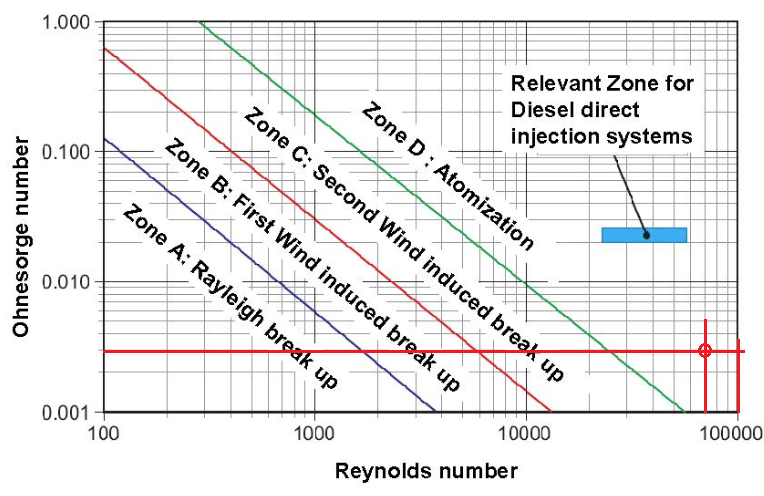

**Вывод:** Second Wind induced break up regime

**Диаметр капли нефтепродуктов** (by Harmon [10]) - странная формула на нее битые ссылки и написано, что для разным режимов в разных книгах

In [25]:
ddrop = 330*pow(doil, 0.3)* pow(visc, 0.07)* pow(roil, -0.648)*pow(sigma, -0.15)*pow(Vel_oil, -0.55)*pow(viscH2, 0.78)*pow(rH2, -0.052)
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 6.353562269284055e-05


**Диаметр капли нефтепродуктов** (Лышевский)

In [26]:
ddrop = 1.44*doil*pow(Oh, 0.1466)*pow(We_l*rH2/roil, -0.266)
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 0.0009805924814931687


**Диаметр капли нефтепродуктов** (Tanasawa and Toyoda [13])

In [27]:
ddrop = 47*doil/Vel_oil*pow(sigma/rH2, 0.25)*(1+331*visc/np.sqrt(roil*sigma*doil))
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 0.01527541518545121


**Диаметр капли нефтепродуктов** (Elkotb [15]])

In [28]:
ddrop = 6156*pow(visc/roil, 0.385)*pow(sigma*roil, 0.737)*pow(rH2, 0.06)*pow(dP/101234, -0.54)/1e6
print('Характерный диаметр капель', ddrop)

Характерный диаметр капель 0.0005419376388273156


**Полученные в ANSYS в расчетной области**

In [29]:
ddrop_ansys = 9.082314e-04
print('Характерный диаметр капель полученный в ANSYS', ddrop_ansys)

Характерный диаметр капель полученный в ANSYS 0.0009082314
